In [2]:
import matplotlib.pyplot as plt
plt.rc('font',family='Microsoft YaHei')
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
plt.rc('font',family='Microsoft YaHei')
station_info_line_1 = pd.read_csv('Data/station_info_line_1.csv',header=0,names=['id','name','longitude','latitude','distance'])


In [8]:
station_info_line_1.head()

,id,name,longitude,latitude,distance
0,0,AA,116.633847,39.91076,786
1,1,AB,116.633600,39.90609,983
2,2,AC,116.645000,39.90669,872
3,3,AD,116.655640,39.90770,437
4,4,AE,116.657900,39.90522,662


In [3]:
station_info_line_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         49 non-null     int64  
 1   name       49 non-null     object 
 2   longitude  49 non-null     float64
 3   latitude   49 non-null     float64
 4   distance   49 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [4]:
station_info_line_1.describe()

,id,longitude,latitude,distance
count,49.00000,49.000000,49.000000,49.000000
mean,24.00000,116.804067,39.833068,926.367347
std,14.28869,0.123154,0.047043,421.655848
min,0.00000,116.633600,39.763380,0.000000
25%,12.00000,116.699100,39.805370,662.000000
50%,24.00000,116.779920,39.823530,886.000000
75%,36.00000,116.905880,39.868760,1100.000000
max,48.00000,117.029740,39.910760,2100.000000


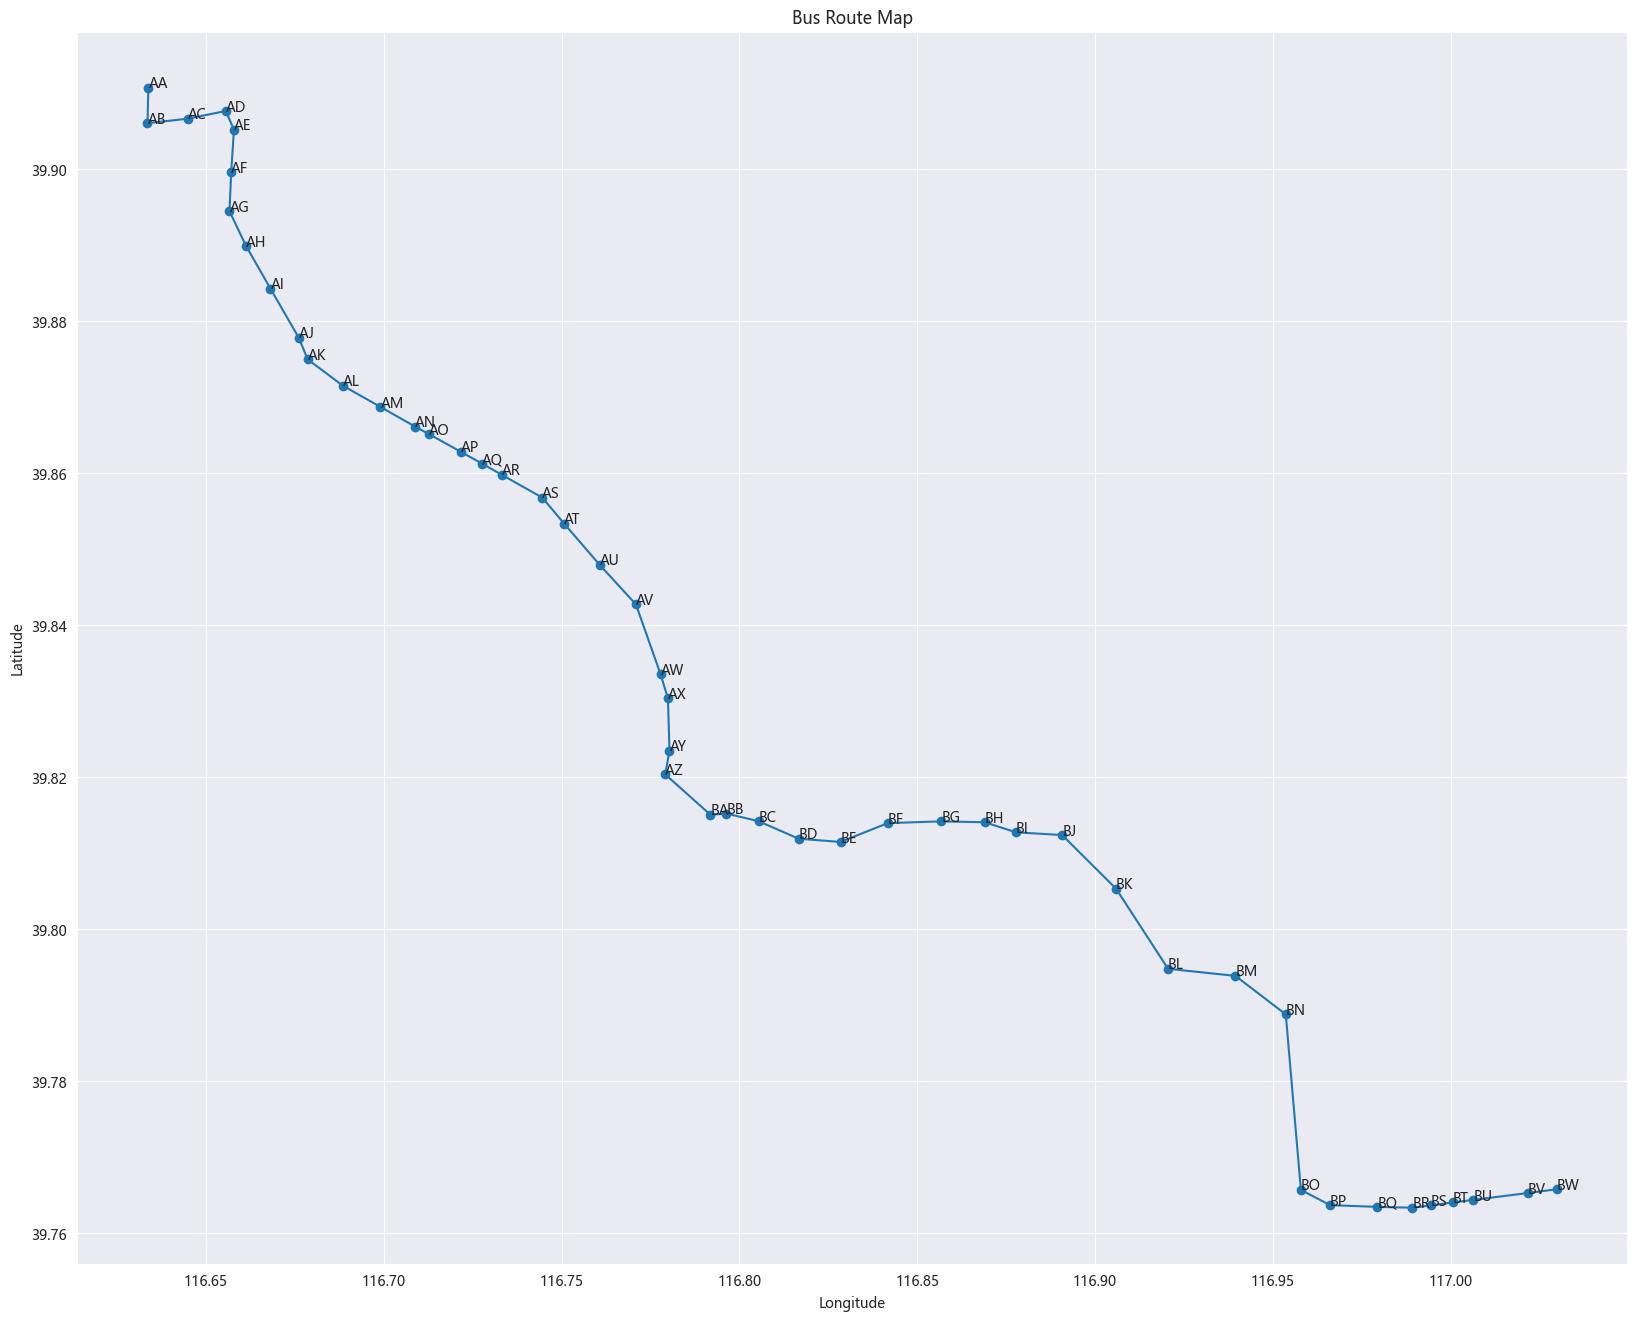

   id name   longitude  latitude  distance
0   0   AA  116.633847  39.91076       786
1   1   AB  116.633600  39.90609       983
2   2   AC  116.645000  39.90669       872
3   3   AD  116.655640  39.90770       437
4   4   AE  116.657900  39.90522       662


In [5]:
# 绘制路线图
plt.figure(figsize=(20, 16))
plt.plot(station_info_line_1['longitude'], station_info_line_1['latitude'], marker='o', linestyle='-')
plt.title('Bus Route Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
for i, txt in enumerate(station_info_line_1['name']):
    plt.annotate(txt, (station_info_line_1['longitude'][i], station_info_line_1['latitude'][i]))
plt.show()

# 显示数据摘要
print(station_info_line_1.head())

In [6]:
import folium

# 创建地图对象
mymap = folium.Map(location=[39.80, 116.72], zoom_start=12)

# 添加站点标记
for index, row in station_info_line_1.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['name'], tooltip=row['name']).add_to(mymap)

# 添加路线
route_points = list(zip(station_info_line_1['latitude'], station_info_line_1['longitude']))
folium.PolyLine(locations=route_points, color='blue').add_to(mymap)

# 保存地图
# mymap.save('bus_route_line_1.html')

# 显示地图
mymap
